In [1]:
# 导包
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.models import Sequential
# from keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD
from keras.layers import Activation

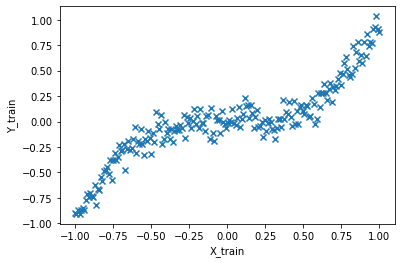

In [2]:
# 生成数据集
X_train = np.linspace(-1,1,200)
noise = np.random.normal(loc=0,scale=0.09,size=X_train.shape)
Y_train = X_train **3 + + noise

# 展示数据集
plt.scatter(X_train,Y_train, marker='x')
plt.xlabel('X_train')
plt.ylabel('Y_train')
plt.show()

In [3]:
# 画模型
model = Sequential()
model.add(Dense(units=3, input_dim=1))
model.add(Activation('tanh'))
model.add(Dense(units=1))
model.add(Activation('tanh'))
model.summary()
sgd = SGD(learning_rate=0.3)

# 编译模型
model.compile(optimizer=sgd, loss='mse')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 6         
                                                                 
 activation (Activation)     (None, 3)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [4]:
# 训练模型
history = model.fit(X_train, Y_train,validation_split=0.05, epochs=500, batch_size=16)

# for step in range(4000):
#    train_cost = model.train_on_batch(X_train, Y_train)
#    if step % 1000 == 0:
#        print('train_cost:', train_cost)

Epoch 1/500
12/12 [==============================] - 1s 10ms/step - loss: 0.1639 - val_loss: 0.2151
Epoch 2/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0417 - val_loss: 0.2526
Epoch 3/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0383 - val_loss: 0.2879
Epoch 4/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0384 - val_loss: 0.2324
Epoch 5/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0387 - val_loss: 0.2909
Epoch 6/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0363 - val_loss: 0.2794
Epoch 7/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0344 - val_loss: 0.1586
Epoch 8/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0355 - val_loss: 0.2556
Epoch 9/500
12/12 [==============================] - 0s 2ms/step - loss: 0.0359 - val_loss: 0.2139
Epoch 10/500
12/12 [==============================] - 0s 3ms/step - loss: 0.0354 - val_loss: 0.2833
Epoch 11

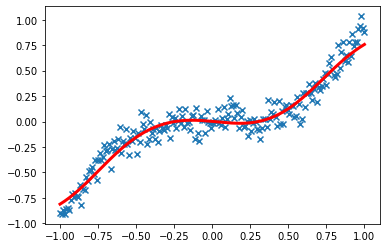

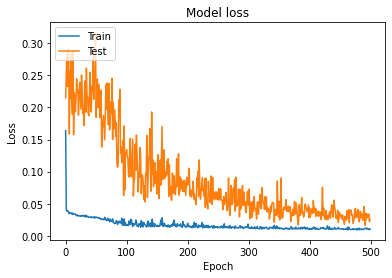

In [5]:
# 看效果
y_pred = model.predict(X_train)
plt.scatter(X_train, Y_train, marker='x')
plt.plot(X_train, y_pred,c='r', lw=3)
plt.show()

# 绘制训练 & 验证的准确率值
# plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

# 绘制训练 & 验证的损失值
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [6]:
# 保存模型
# model.save('小白的非线性回归模型.h5')
W,b = model.layers[0].get_weights()
print(f'第0层: Weights={W}Biases={b}')
W,b = model.layers[2].get_weights()
print(f'第2层: Weights={W}Biases={b}')

第0层: Weights=[[-1.6177319  1.9528673  1.4554806]]Biases=[-1.7893898  -0.19585909 -1.376018  ]
第2层: Weights=[[-1.7423156 ]
 [-0.49983668]
 [ 1.5280346 ]]Biases=[-0.3983733]


In [7]:
print('预测',model.predict([0.75]))

预测 [[0.45067143]]
